<a href="https://colab.research.google.com/github/larissa-rangel/MO443-processamento-de-imagem-digital/blob/main/MO443_T1_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.6 Quantização de Imagens


Fontes:https://www.educba.com/opencv-normalize/
https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga87eef7ee3970f86906d69a92cbf064bd

https://www.tutorialspoint.com/how-to-normalize-an-image-in-opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Importando todas as bibliotecas necessárias
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import cv2 as cv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(512, 512) uint8
230 0


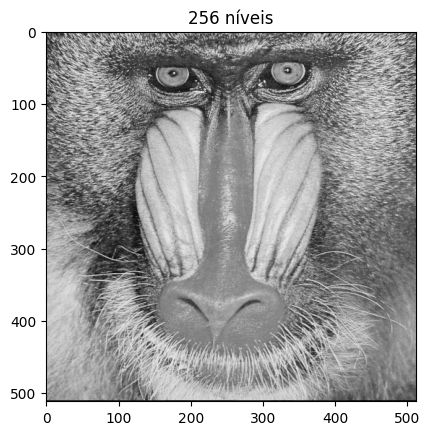

In [ ]:
baboon = io.imread('/content/drive/MyDrive/Testes/baboon.png')  #Carregando a imagem da pasta no drive e armazenando em uma matriz np.array
print(baboon.shape, baboon.dtype)#Imprimir as dimensões da matriz que contém os dados da imagem
print(baboon.max(),baboon.min()) #Imprimir o valor máximo e mínimo da matriz que contém os dados da imagem
plt.title('256 níveis')# colocar título na figura
plt.imshow(baboon,cmap='gray')#Exibir os dados da matriz como uma imagem em  RGB
plt.show()#Exibir a figura aberta

(512, 512) uint8
1 0
(512, 512) uint8
3 0
(512, 512) uint8
7 0
(512, 512) uint8
15 0
(512, 512) uint8
31 0
(512, 512) uint8
63 0


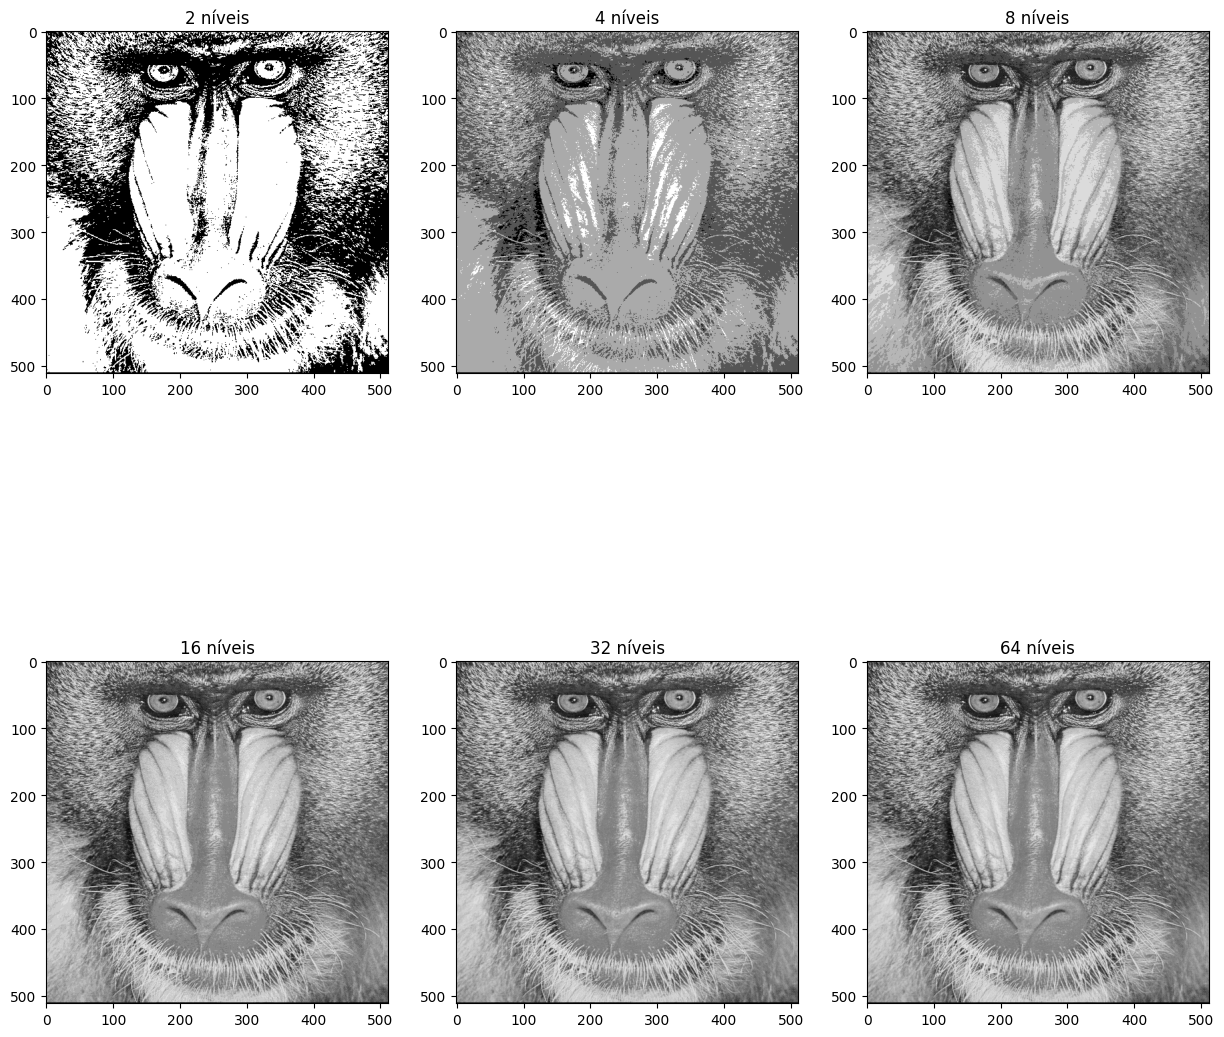

In [ ]:
level = np.arange(1,7,1) #um vetor com as potências dos níveis
fig = plt.figure(figsize=(15,15))#cria uma figura de tamanho (15,15)
rows = 2 #linhas
columns = 3 #colunas
for i in range(len(level)): #Este laço percorre o vetor level e faz o cálculo de quantização usando a função normalize além de, plotar todas as imagens em apenas uma figura
  baboon_quantized = cv.normalize(src=baboon, dst=None, alpha=0, beta=(2 ** level[i]-1), norm_type=cv.NORM_MINMAX)
  #A função normalize normaliza a matriz de entrada baboon de forma que o valor mínimo seja  alpha e o valor máximo beta.
  #cv::normalize faz sua mágica usando apenas escalas e deslocamentos (ou seja, somando constantes e multiplicando por constantes).
  print(baboon_quantized.shape,baboon_quantized.dtype) #verificar as dimensões e os tipos de cada matriz quantizada a cada iteração
  print(baboon_quantized.max(),baboon_quantized.min()) #verificar os valores máximos e mínimos de cada matriz quantizada a cada iteração
  fig.add_subplot(rows, columns, i+1) #vai adicionando as imagens em cada grade da figura
  plt.title(str((2 ** level[i]))+' níveis') #adiciona o título as figuras
  plt.imshow(baboon_quantized,cmap='gray', vmin=0, vmax=(2 ** level[i])-1) #exibir a figura quantizada usando o vmin e o vmax pois o imshow costuma retornar os valores de voltar para o intervalo 0 a 255


plt.show()#exibir a figura